<a href="https://colab.research.google.com/github/Venchislav/Data-Science/blob/main/BinaryPredictionofSmokerStatus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('/content/sample_data/train.csv', index_col='id')
test = pd.read_csv('/content/sample_data/test.csv', index_col='id')

# **STAGE 1: DATA RESEARCH**

In [3]:
train.shape

(159256, 23)

In [4]:
test.shape

(106171, 22)

In [5]:
train.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
id,,,,,,,,,,,,,,,,,,,,,
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1


In [6]:
train.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [7]:
train.dtypes

age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)            int64
hearing(right)           int64
systolic                 int64
relaxation               int64
fasting blood sugar      int64
Cholesterol              int64
triglyceride             int64
HDL                      int64
LDL                      int64
hemoglobin             float64
Urine protein            int64
serum creatinine       float64
AST                      int64
ALT                      int64
Gtp                      int64
dental caries            int64
smoking                  int64
dtype: object

In [8]:
train.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,76.874071,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,8.994642,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [9]:
train['smoking'].value_counts()

0    89603
1    69653
Name: smoking, dtype: int64

# **STAGE 2: PLOTTING**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [11]:
warnings.filterwarnings('ignore')

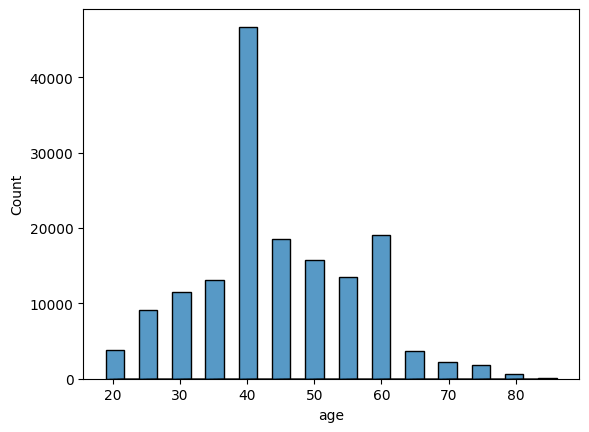

In [12]:
sns.histplot(train['age'], shrink=5);

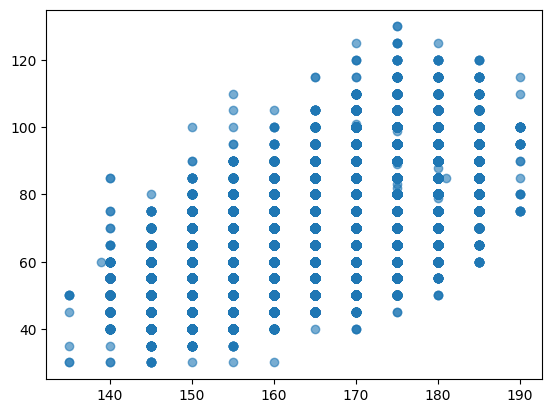

In [13]:
plt.scatter(x=train['height(cm)'], y=train['weight(kg)'], alpha=0.6);

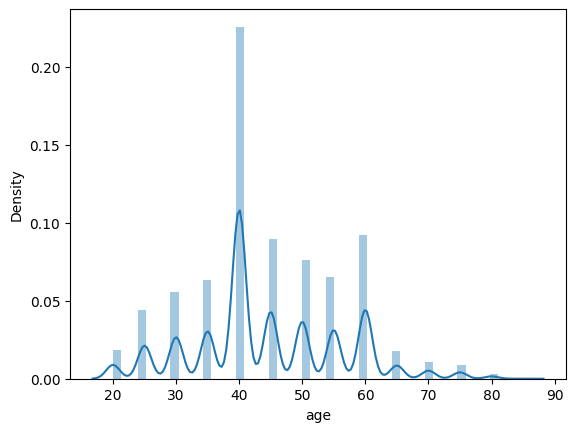

In [14]:
sns.distplot(train['age']);

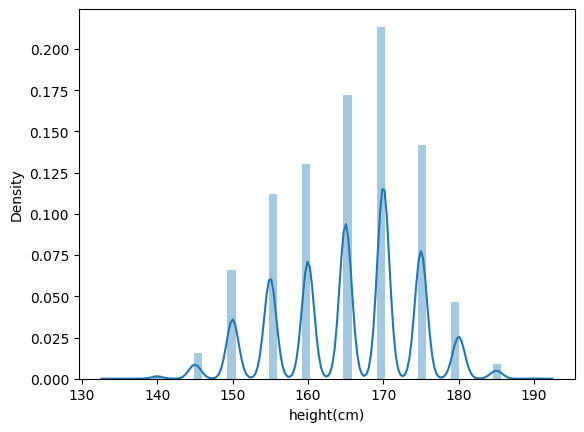

In [15]:
sns.distplot(train['height(cm)']);

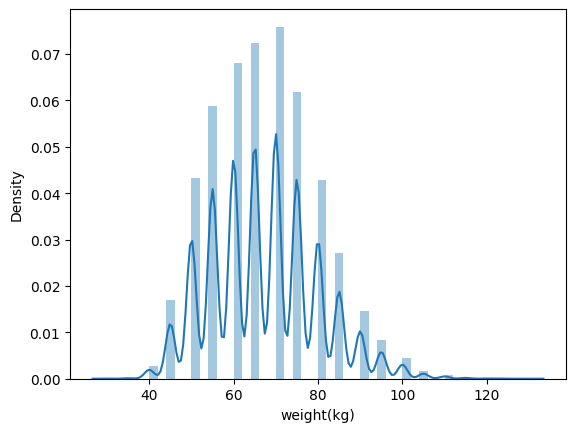

In [16]:
sns.distplot(train['weight(kg)']);

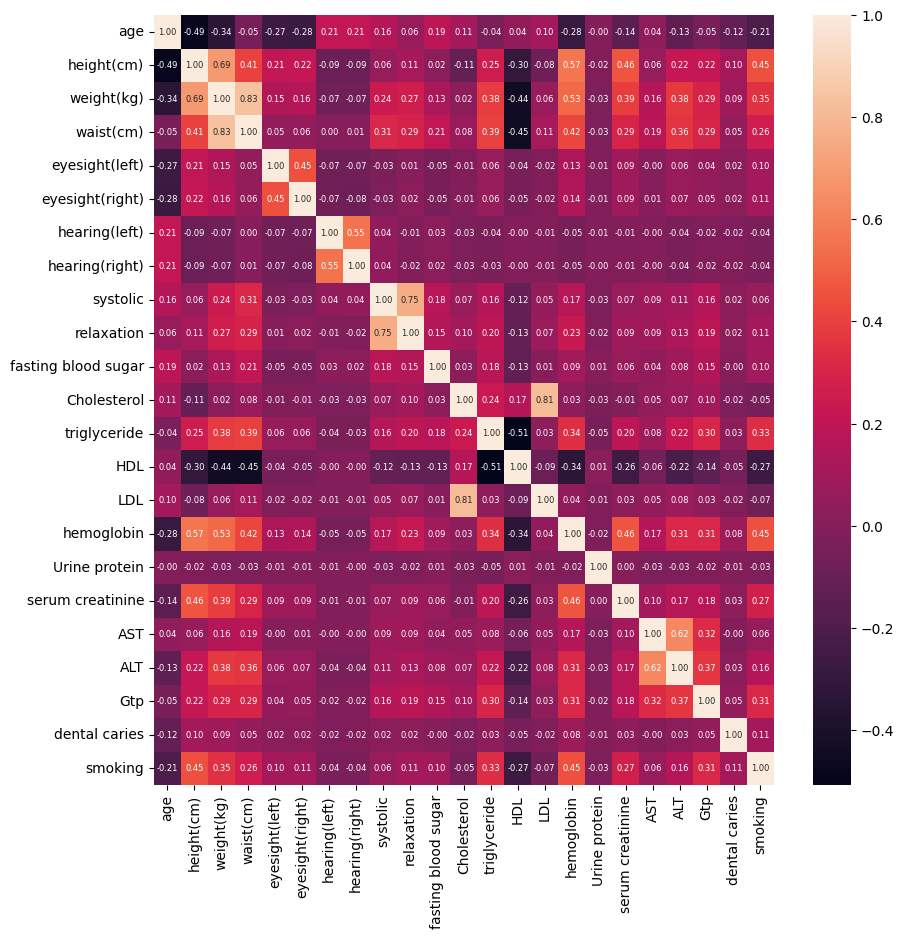

In [17]:
corr = train.corr()
fig = plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, annot_kws={"fontsize": 6}, fmt=".2f");

# **STAGE 3: DATA PREPROCESSING**

Note: I gonna try RandomForest, KNN, LogisticRegression and Decision Tree classifiers

In [18]:
train.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [19]:
test.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = train.drop('smoking', axis=1)
y = train['smoking']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print('-'*60)
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')

X_train shape (111479, 22)
y_train shape (111479,)
------------------------------------------------------------
X_test shape (47777, 22)
y_test shape (47777,)


# **STAGE 4: MODEL FORMING AND TRAINING**

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [25]:
lr = LogisticRegression()

In [26]:
LogisticRegression?

In [27]:
lr.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred = lr.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [29]:
y_test

id
145654    1
49118     1
21769     1
108299    0
117130    0
         ..
104270    1
117983    1
38666     0
6812      1
35266     0
Name: smoking, Length: 47777, dtype: int64

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test, y_pred)

0.7334282185989074

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
clf = DecisionTreeClassifier()

param_grid = {'max_depth': range(1, 10 + 1),
              'min_samples_split': range(1, 10 + 1),
              'criterion': ['gini', 'entropy']}

grid = GridSearchCV(clf, param_grid, cv=3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 11),
                         'min_samples_split': range(1, 11)})

In [34]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 4}

In [35]:
clf = grid.best_estimator_

In [36]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=4)

In [37]:
y_pred = clf.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred)

0.7547564727797894

**Random Forest**

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
KNeighborsClassifier?

In [41]:
clf1 = KNeighborsClassifier()

param_grid = {'n_neighbors': range(5, 100, 10)}

grid = GridSearchCV(clf1, param_grid, cv=2)
grid.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(5, 100, 10)})

In [42]:
grid.best_params_

{'n_neighbors': 85}

In [47]:
clf1 = grid.best_estimator_

In [48]:
clf1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=85)

In [49]:
y_pred = clf1.predict(X_test)

In [50]:
accuracy_score(y_test, y_pred)

0.7451284090671243

In [51]:
# Well, seems that these are the best results we can get...
# I checked other's code on kaggle and they use XGBoost and other unknown for me algos and other tools
# So for now, mayb it's my best here...
# I was coding for 3 hours in a row for now, so, that's it here.
# That's all I can do here for now

# **<a href='https://www.kaggle.com/competitions/playground-series-s3e24/overview'>Link to the competition:</a>**<br>

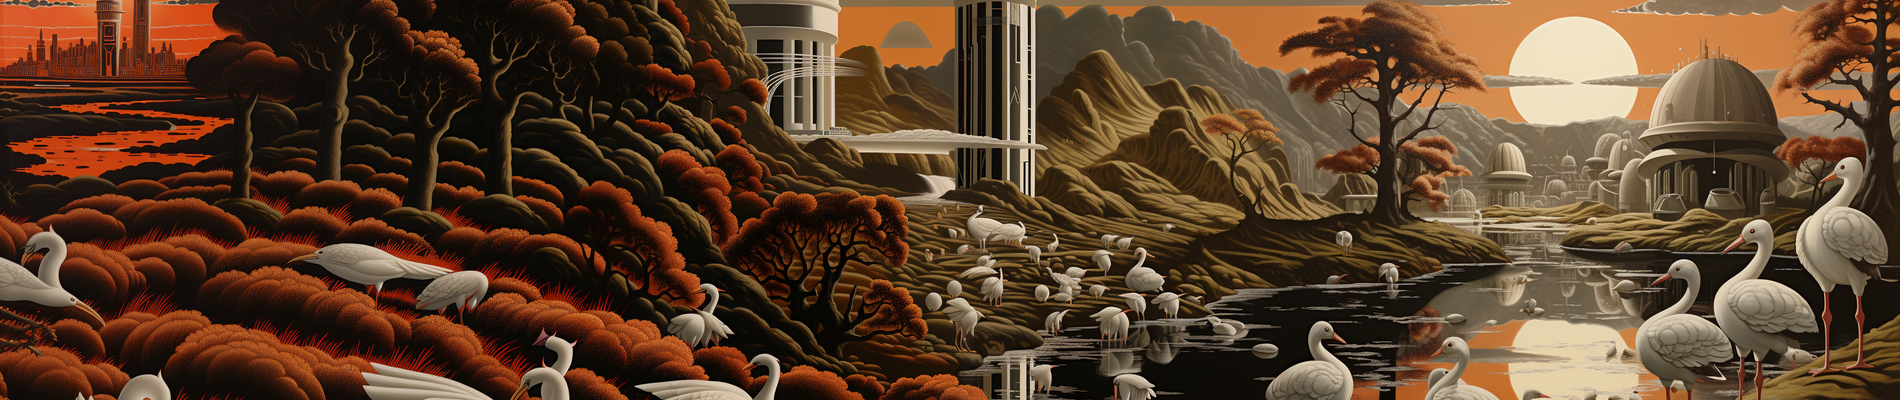
